# Predicting Default Risk 

# Nhóm trưởng: Châu Thanh Uy_K214130928
# Tên thành viên: 
# Nguyễn Cao Gia Bảo_K214130913
# Nguyễn Đức Bảo Lâm_K214132009
# Nguyễn Thu Trang_K214132021

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,  LabelBinarizer, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Explore and clean up the data

In [2]:
train_df = pd.read_excel('/Users/chauthanhuy/Documents/Luận PTDL CK/Predicting Default Risk/credit-data-training.xlsx')

In [3]:
train_df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,$100-$1000,< 1yr,1,No,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,$100-$1000,< 1yr,1,No,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,No,1-4 yrs,2,No,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,No,1-4 yrs,1,No,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,No,< 1yr,4,No,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
train_df.shape

(500, 20)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

We have 500 rows and 20 columns. Now let's check the missing data.

In [6]:
train_df.describe(include='object')

,Credit-Application-Result,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
count,500,500,500,500,500,500,500,500,500
unique,2,2,3,4,3,3,2,1,2
top,Creditworthy,No Account,Paid Up,Home Related,No,< 1yr,No,Other Banks/Depts,1
freq,358,262,260,355,298,279,457,500,320


In [7]:
train_df.describe(exclude='object')

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


### Let's check missing data values

In [8]:
# check missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']>0]

,Total,%
Duration-in-Current-address,344,68.8
Age-years,12,2.4


As we can see in the above observation that the `Duration-in-Current-address` has missing 344(68.8%) out of 500 records and `Age-years` has missing 12(2.4%) out of 500 records. The `Duration-in-Current-address` variable missing almost 69 percent of our data and probably our model will not have changes if we drop this variable. But we impute the `Age-years` variable by comparing mean and median values.

In [9]:
# Let's print the mean and median of Age-years
mean_age = train_df['Age-years'].mean()
median_age = train_df['Age-years'].median()

print("The mean of Age-years:", mean_age)
print("The median of Age-years:", median_age)

The mean of Age-years: 35.63729508196721
The median of Age-years: 33.0


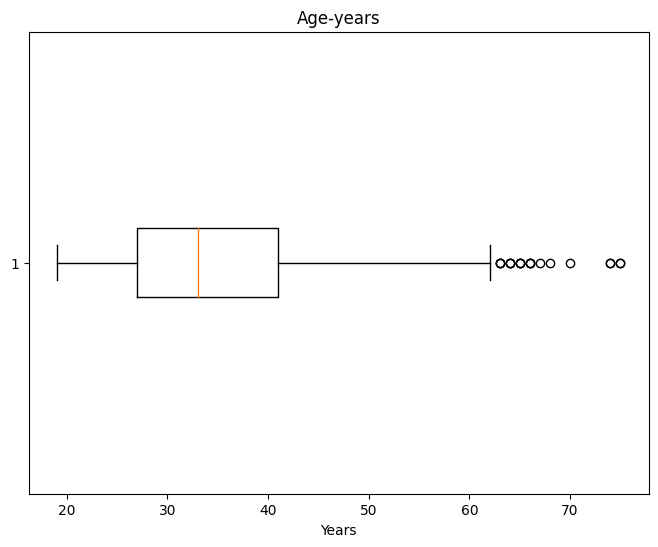

In [61]:
plt.figure(figsize=(8, 6))
plt.boxplot(train_df['Age-years'], vert=False)
plt.title("Age-years")
plt.xlabel("Years")
plt.show()

Therefore, we will impute the missing values of `Age-years` variable with median because mean will have an outlier.

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
age_t = train_df['Age-years'].values
train_df['Age-years'] = imp.fit_transform(age_t.reshape(-1, 1))

In [11]:
train_df.drop(columns='Duration-in-Current-address', axis=1, inplace=True)

# let's plot the distribution of the categorical variables.

In [12]:
categorical = [
    'Account-Balance',
    'Payment-Status-of-Previous-Credit',
    'Purpose',
    'Value-Savings-Stocks',
    'Length-of-current-employment',
    'No-of-Credits-at-this-Bank',
    'Guarantors',
    'Concurrent-Credits'
    
]
numerical = [
    'Duration-of-Credit-Month',
    'Credit-Amount',
    'Instalment-per-cent',
    'Most-valuable-available-asset',
    'Age-years',
    'Type-of-apartment',
    'Occupation',
    'No-of-dependents',
    'Telephone',
    'Foreign-Worker'
]


Text(0.5, 1.0, 'Distribution of Categorical Variables')

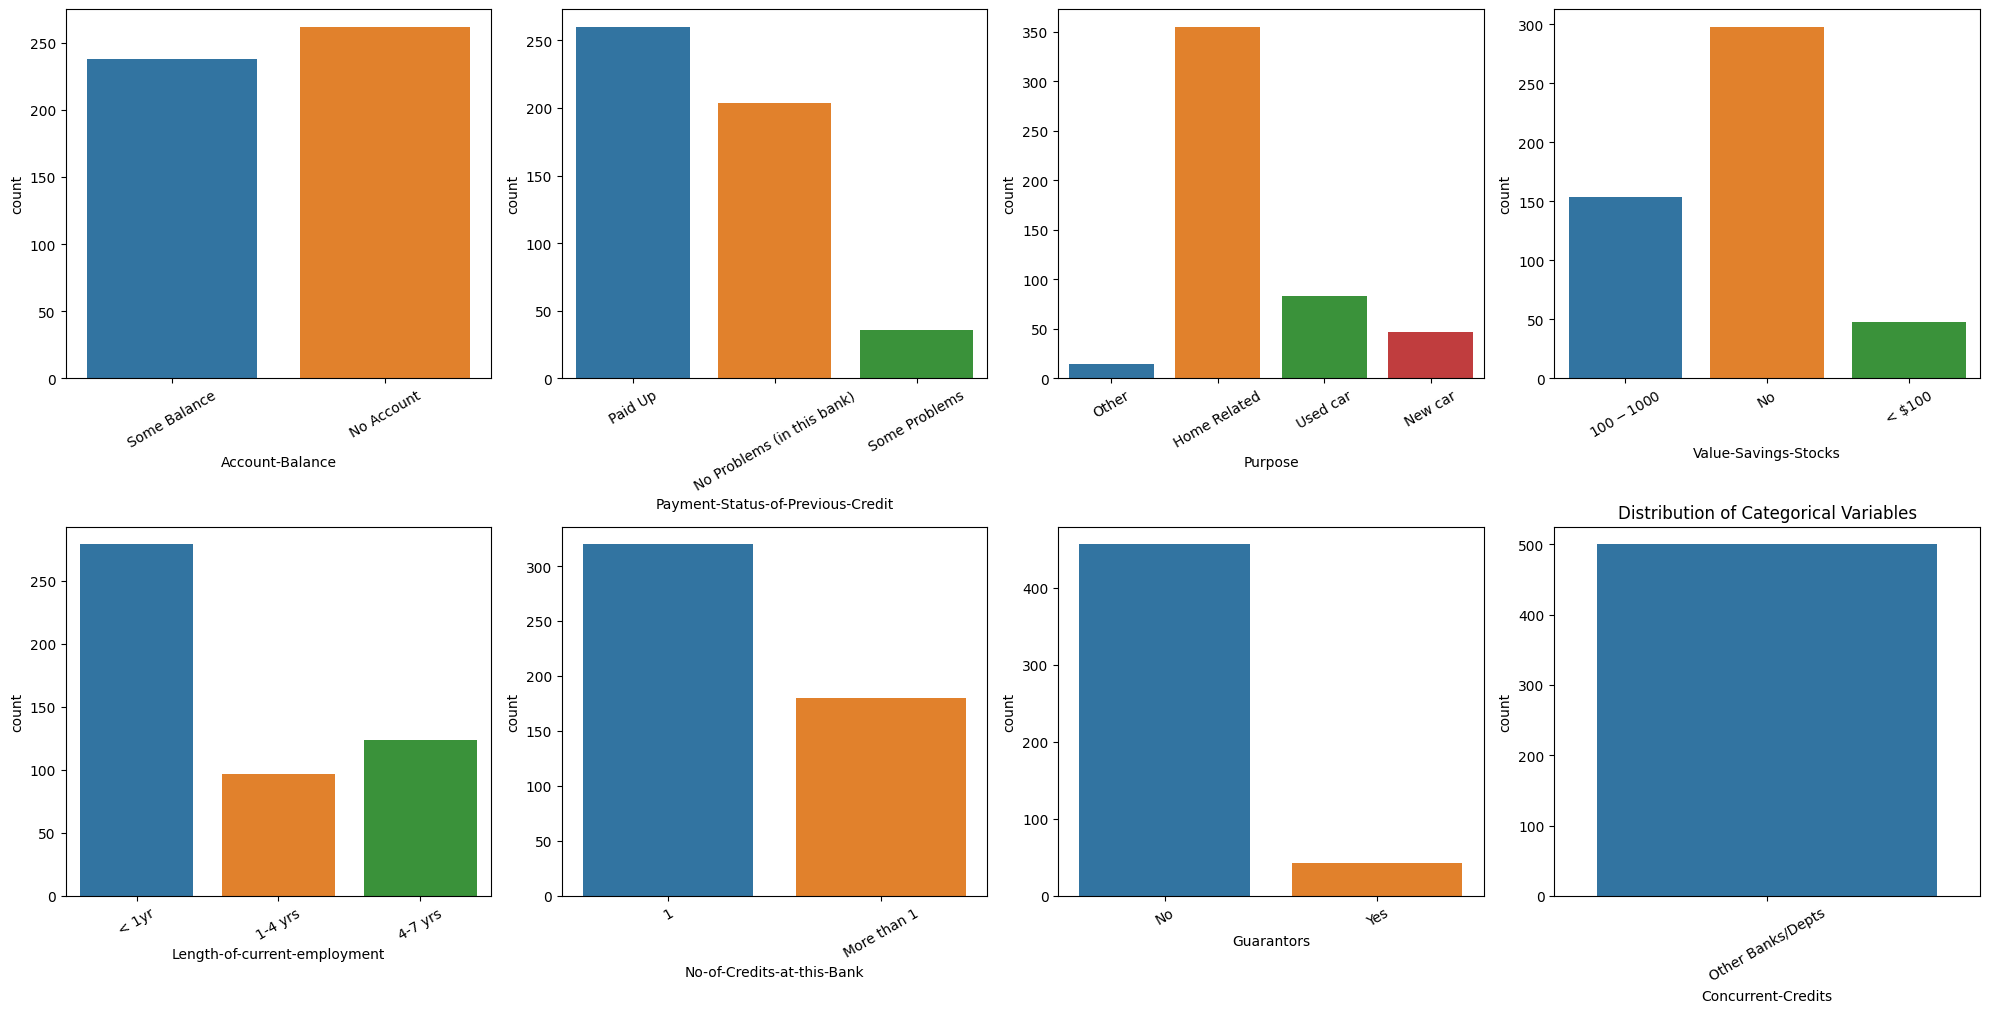

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=train_df[variable], ax=subplot)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(30)
plt.title("Distribution of Categorical Variables")


We have 8 categorical variables and the distribution of the varibales are visualized in the above distribution plot. From the above plot we can see that `Guarantors` has skewed more data points to None category and `Concurrent-credits` varibale also has one category. These variables will not have significant changes to our model. Therefore, we will drop them.

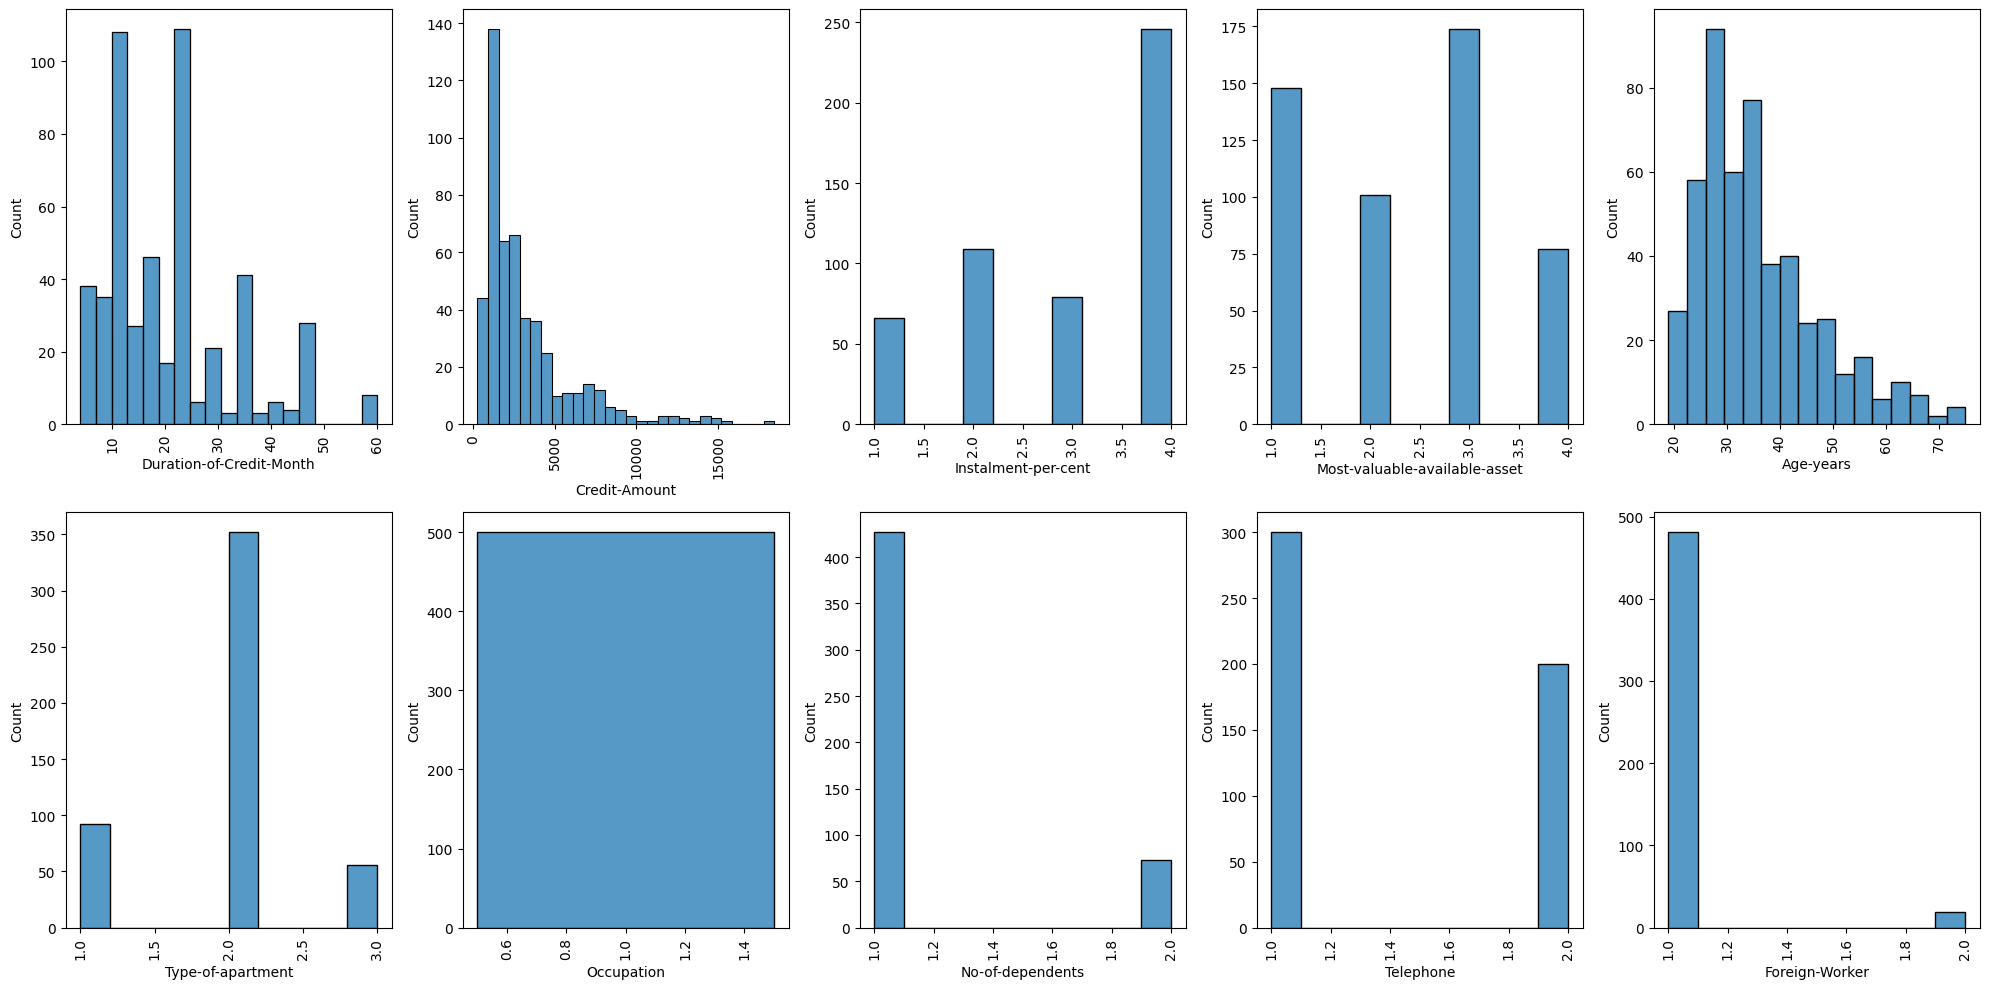

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(train_df[variable], ax=subplot,  )
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


We can also understand that the distributions of numerical variables above. From this, `Occupation` has one data value, `No-of-dependents`, and `Foreign-Worker`  has low variability and `Telephone` also not important. We will drop these variables because they will not have statistically significant value to our model.

# Select Predictors and separate the target variable
The target variable is `Credit-Application-Result`
Therefore, based on the above analysis I will select the predictors and separate the target variable.

In [15]:
# select the target variable
y = train_df['Credit-Application-Result']
train_df.drop(columns=['Credit-Application-Result', 
                    'Telephone', 'Foreign-Worker',
                    'Occupation','No-of-dependents',
                    'Guarantors','Concurrent-Credits'], axis=1, inplace=True)

In [16]:
# encoding Purpose to numeric
train_df['Purpose']=train_df['Purpose'].astype("category")
train_df['Purpose']=train_df['Purpose'].cat.codes

In [17]:
# list of  categorical variables
cat_features = [
    'Account-Balance',
    'Payment-Status-of-Previous-Credit',
    'Value-Savings-Stocks',
    'Length-of-current-employment',
    'No-of-Credits-at-this-Bank'
]
# list of numerical variables
num_features = [
    'Duration-of-Credit-Month',
    'Credit-Amount',
    'Instalment-per-cent',
    'Purpose',
    'Most-valuable-available-asset',
    'Age-years',
    'Type-of-apartment'
]


In [18]:
data = pd.DataFrame(list(cat_features + num_features), columns=['Fields'])
data

,Fields
0,Account-Balance
1,Payment-Status-of-Previous-Credit
2,Value-Savings-Stocks
3,Length-of-current-employment
4,No-of-Credits-at-this-Bank
5,Duration-of-Credit-Month
6,Credit-Amount
7,Instalment-per-cent
8,Purpose
9,Most-valuable-available-asset


I have selected 12 (6 categorical and 6 numerical) variables as predictor variables and `Credit-Application-Result` as a target variable. And then I have trasformed the categorical variables to numerical using `LabelEncoder` because the machine learning model could not train the categorical variables.

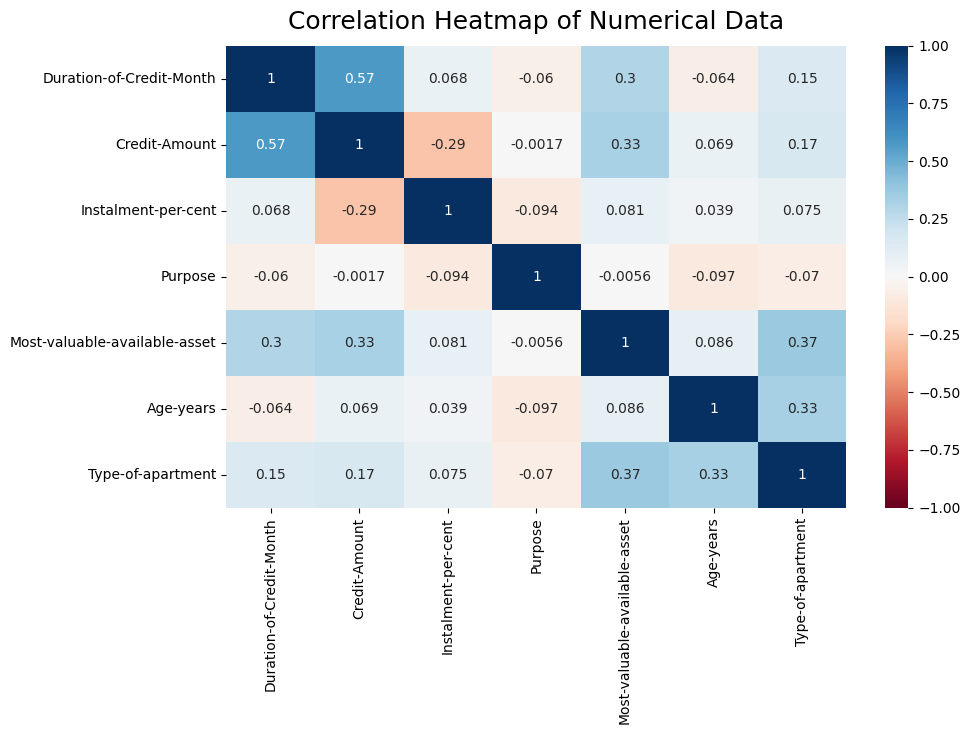

In [20]:
plt.figure(figsize=(10,6))
features = train_df[ num_features]

heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True, center=0, cmap='RdBu')
heatmap.set_title('Correlation Heatmap of Numerical Data', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

`Credit-Amount` and `Duration-of-Credit-Month` are correlated each other but not severaly correlated(positively correlated) and the remaining variables have no strong correlation with each other.

Once transformed the categorical variables encoding them using the `OneHotEncoder` to make sense our training dataset.

In [21]:
# Preprocessing Data for Models
transformer = ColumnTransformer(
    [
        ('scaler' , StandardScaler(), num_features),
        ('encoder', OneHotEncoder(drop='first'), cat_features)
    ], 
    remainder='drop'
)

In [22]:
# Convert to nummeric
cat_var = pd.get_dummies(train_df[cat_features], drop_first=True)

In [23]:
# Concat to numerical varibles and train the model
X_train = pd.concat([train_df[num_features], cat_var], axis=1)

In [24]:
X_train.head(20)

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_< $100,Value-Savings-Stocks_No,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,2,1,33.0,2,True,True,False,False,False,False,True,False
1,4,1494,1,0,1,29.0,2,True,True,False,False,False,False,True,False
2,4,1544,2,0,1,42.0,2,True,False,False,False,True,False,False,True
3,4,3380,1,0,1,37.0,2,True,False,False,False,True,False,False,False
4,6,343,4,0,1,27.0,2,False,True,False,False,True,False,True,False
5,6,362,4,0,3,52.0,2,True,False,False,True,False,False,True,True
6,6,433,4,0,2,24.0,1,False,False,True,False,False,False,True,False
7,6,454,3,0,2,22.0,2,False,True,False,False,True,False,True,False
8,6,484,3,0,1,28.0,2,False,True,False,False,True,False,False,False
9,6,660,2,0,1,23.0,1,True,True,False,False,False,False,False,False


#### The next step is normalizing the train dataset using `MinMaxScaler`.

In [25]:
# Get column names first
col_names = X_train.columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=col_names)

In [26]:
X_train.head(20)

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_< $100,Value-Savings-Stocks_No,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,0.000000,0.067115,0.000000,0.666667,0.000000,0.250000,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.067115,0.000000,0.000000,0.000000,0.178571,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.069870,0.333333,0.000000,0.000000,0.410714,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.171038,0.000000,0.000000,0.000000,0.321429,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.035714,0.003692,1.000000,0.000000,0.000000,0.142857,0.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.035714,0.004739,1.000000,0.000000,0.666667,0.589286,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6,0.035714,0.008651,1.000000,0.000000,0.333333,0.089286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.035714,0.009808,0.666667,0.000000,0.333333,0.053571,0.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.035714,0.011461,0.666667,0.000000,0.000000,0.160714,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.035714,0.021159,0.333333,0.000000,0.000000,0.071429,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Now our train dataset is normalized and scaled in the range of min and max values.

<Axes: >

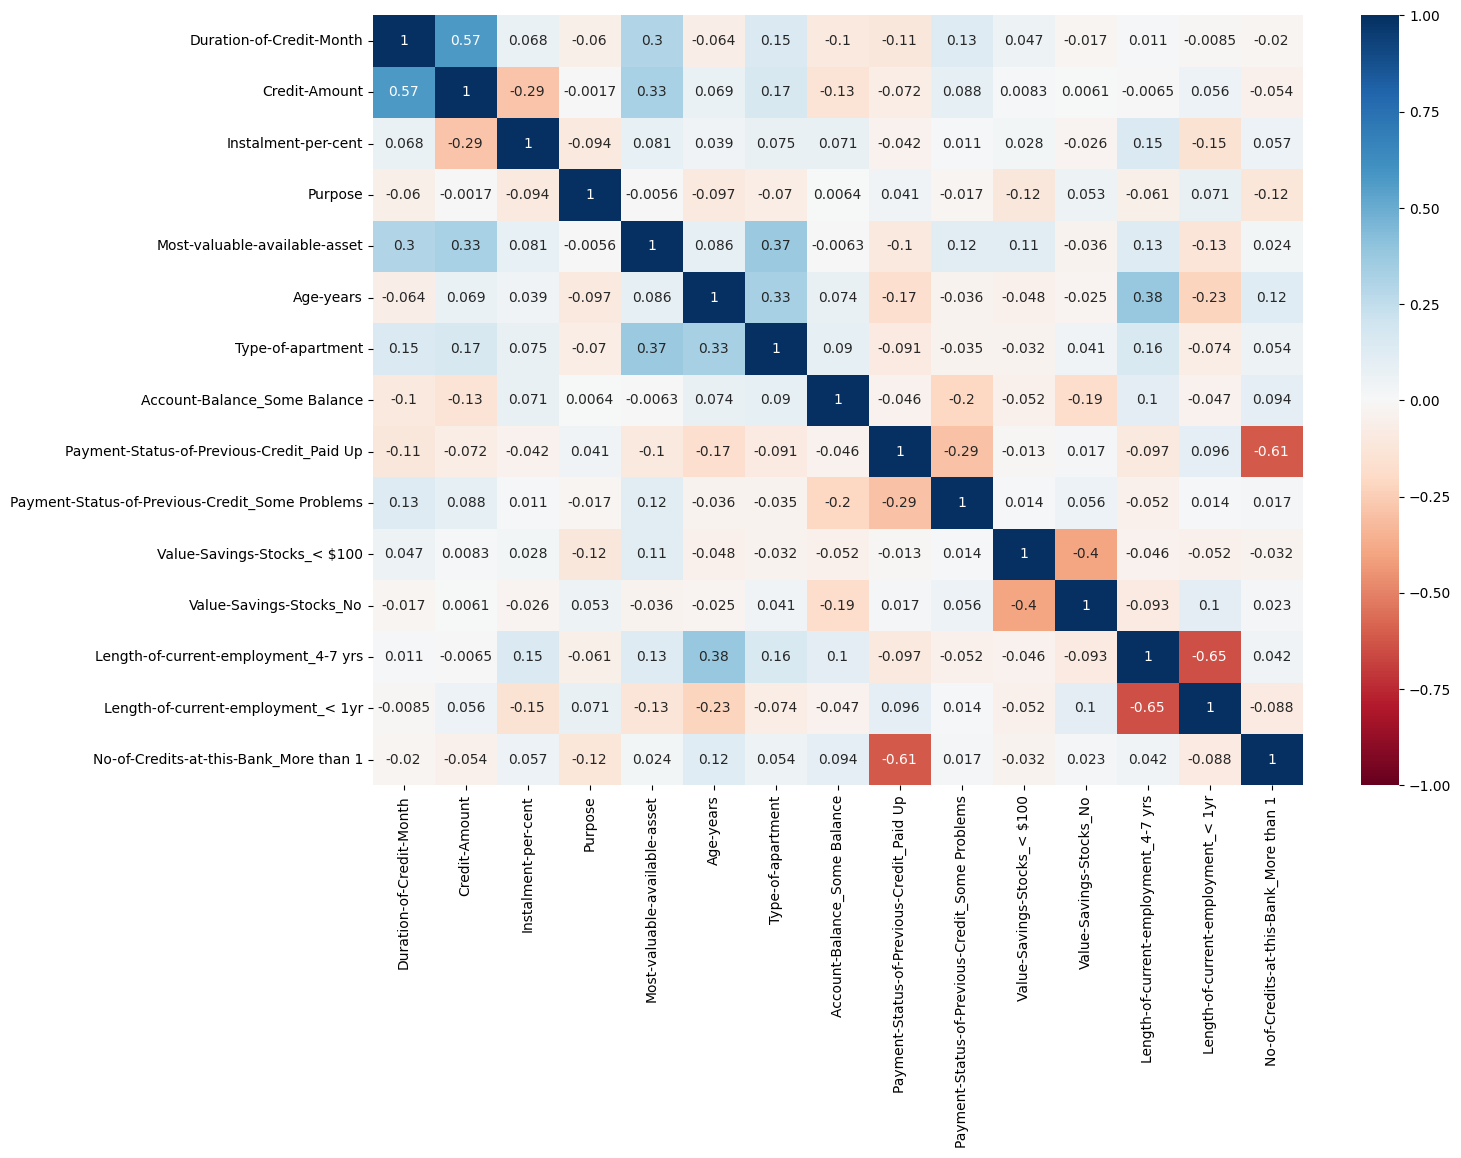

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot = True,cmap="RdBu", center=0, vmin=-1, vmax=1)

# Train and validate the model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_X, test_X, train_y, test_y = train_test_split(X_train, y, test_size=0.3, random_state = 1)

## Train the model using Logistic Regression

In [35]:
lreg = LogisticRegression(solver='liblinear')

In [36]:
lreg.fit(train_X, train_y)
y_pred = lreg.predict(test_X)

Text(0.5, 0, 'Relative Feature Importance of Logistic Regression')

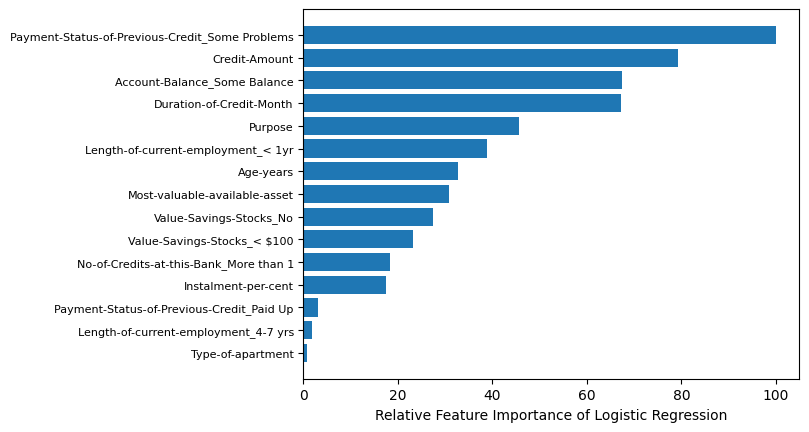

In [37]:
feature_importance = abs(lreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance of Logistic Regression')


### Confusion Matrix

A confusion matrix is formed from the four outcomes produced as a result of binary classification.
- True Positive(TP)
- True Negative(TN)
- False Positive(FP)
- False Negative(FN)

<Axes: >

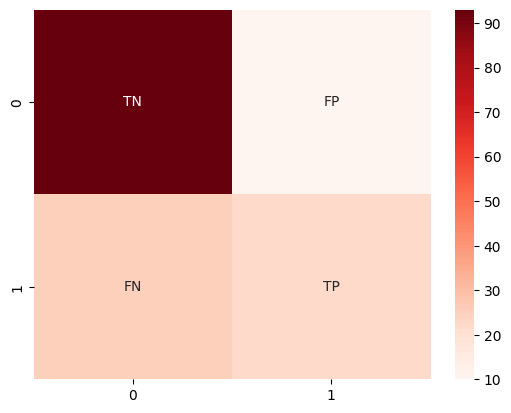

In [38]:
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(test_y, y_pred), annot=labels, fmt='', cmap='Reds')

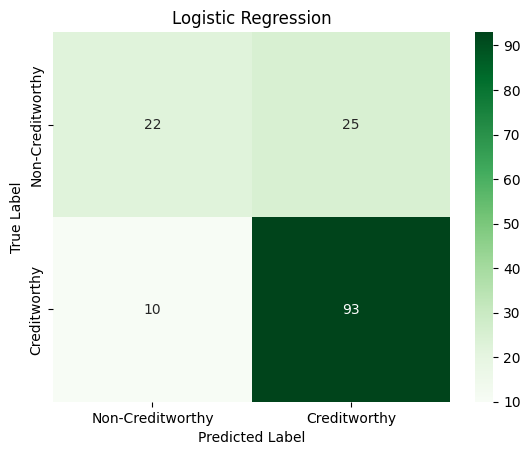

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y, y_pred, labels=['Non-Creditworthy', 'Creditworthy'])

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Creditworthy', 'Creditworthy'],
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [148]:
print(classification_report(test_y, y_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.79      0.90      0.84       103
Non-Creditworthy       0.69      0.47      0.56        47

        accuracy                           0.77       150
       macro avg       0.74      0.69      0.70       150
    weighted avg       0.76      0.77      0.75       150



### Extracting TP, TN, FP, FN

In [149]:
tp, fp, fn, tn= confusion_matrix(test_y, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)



True Negatives:  22
False Positives:  10
False Negatives:  25
True Positives:  93


### The percentage accuracy of the model
The percentange accuracy of the model is calculated from the confusion matrix that is the percentage of `(TN + TP) * 100 / (TN + TP + FN + FP))`

In [42]:
from sklearn.metrics import accuracy_score

print(classification_report(test_y, y_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.79      0.90      0.84       103
Non-Creditworthy       0.69      0.47      0.56        47

        accuracy                           0.77       150
       macro avg       0.74      0.69      0.70       150
    weighted avg       0.76      0.77      0.75       150



In [43]:
# Accuracy
lr_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
lr_creditworthy=round(tp/(tp+fp), 2)
lr_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(lr_acc))
lr_creditworthy, lr_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.77%


(0.9, 0.47)

## 2. Using RandomForestClassifier

The dataset is already cleaned, formatted, splitted and ready for prediction, then I am going to validate and evaluate the test dataset using RandomForestClassifier.

In [44]:
# define the model
rfc = RandomForestClassifier(n_estimators = 500, max_features = 13, min_samples_leaf = 6, min_samples_split=3)
# train the model / fit the train dataset
rfc.fit(train_X, train_y)

RandomForestClassifier(max_features=13, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=500)

In [45]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_features': range(2, 13),
    'min_samples_leaf': range(2, 8),
    'min_samples_split': range(2, 12),
    'n_estimators': [100, 200, 300, 400, 500]
}

rfc_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
rfc_grid.fit(train_X, train_y)

In [47]:
rfc_grid.best_estimator_

RandomForestClassifier(max_features=7, min_samples_leaf=7, min_samples_split=5)

In [151]:
rfc_grid.best_estimator_.feature_importances_

array([0.18283816, 0.25848513, 0.04778639, 0.02893009, 0.05052346,
       0.11562587, 0.01228453, 0.10332621, 0.0226783 , 0.06616704,
       0.00096106, 0.04009164, 0.01210382, 0.04236681, 0.0158315 ])

Variables importance chart below

<function matplotlib.pyplot.show(close=None, block=None)>

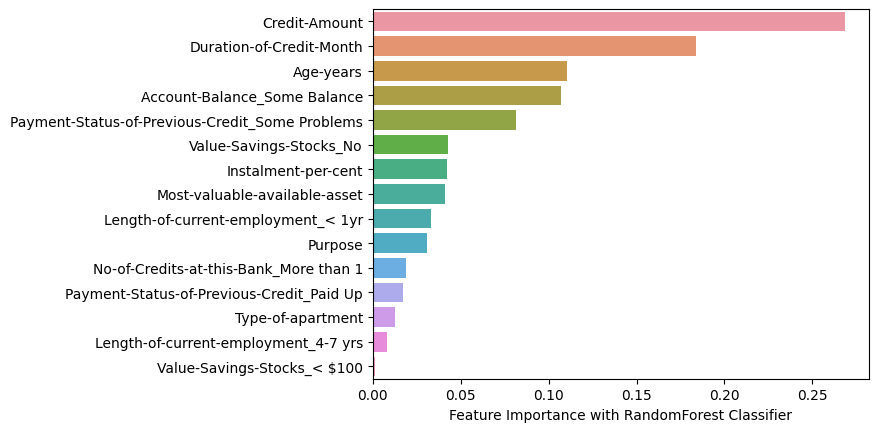

In [142]:
df_feature_importance = pd.DataFrame(rfc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with RandomForest Classifier')
plt.show

### Confusion matrix

In [156]:
rfc_pred = rfc.predict(test_X)

In [147]:
print(classification_report(test_y, rfc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.81      0.90      0.85       103
Non-Creditworthy       0.71      0.53      0.61        47

        accuracy                           0.79       150
       macro avg       0.76      0.72      0.73       150
    weighted avg       0.78      0.79      0.78       150



In [157]:
tp, fp, fn, tn= confusion_matrix(test_y, rfc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  25
False Positives:  10
False Negatives:  22
True Positives:  93


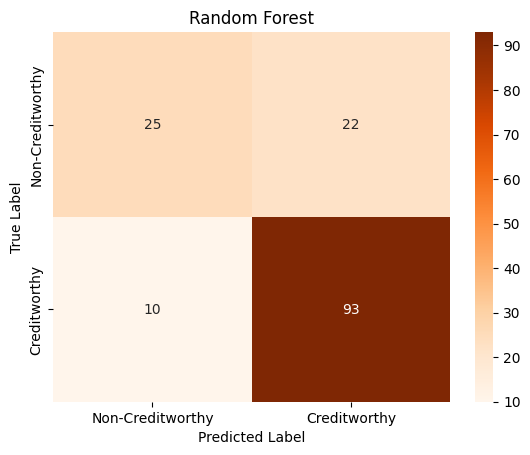

In [158]:
cm1 = confusion_matrix(test_y, rfc_pred, labels=['Non-Creditworthy', 'Creditworthy'])

sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Non-Creditworthy', 'Creditworthy'],
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [152]:
# Accuracy
rfc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
rfc_creditworthy=round(tp/(tp+fp), 2)
rfc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(rfc_acc))
rfc_creditworthy, rfc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.79%


(0.9, 0.53)

## 3. Using DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
# fiting the model
dtc.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
# predict the y
dtc_pred = dtc.predict(test_X)

In [58]:
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

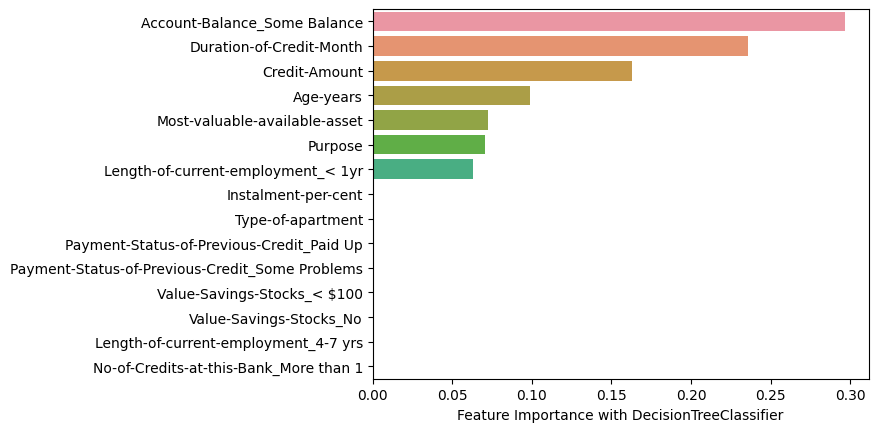

In [59]:
df_feature_importance = pd.DataFrame(dtc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with DecisionTreeClassifier')
plt.show

### Confusion Matrix

In [63]:
print(classification_report(test_y, dtc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.74      0.87      0.80       103
Non-Creditworthy       0.55      0.34      0.42        47

        accuracy                           0.71       150
       macro avg       0.65      0.61      0.61       150
    weighted avg       0.68      0.71      0.68       150



In [64]:
tp, fp, fn, tn= confusion_matrix(test_y, dtc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  16
False Positives:  13
False Negatives:  31
True Positives:  90


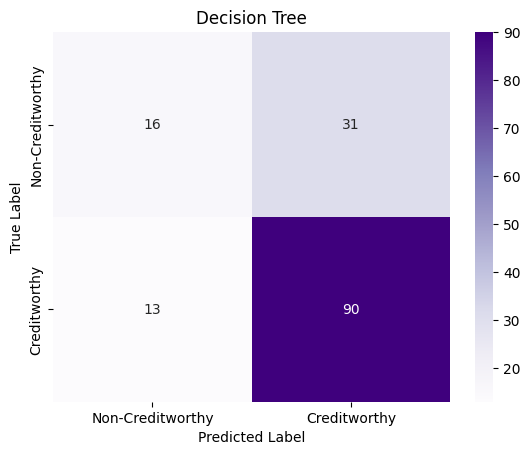

In [138]:
cm2 = confusion_matrix(test_y, dtc_pred, labels=['Non-Creditworthy', 'Creditworthy'])

sns.heatmap(cm2, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Creditworthy', 'Creditworthy'],
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score

print(classification_report(test_y, dtc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.74      0.87      0.80       103
Non-Creditworthy       0.55      0.34      0.42        47

        accuracy                           0.71       150
       macro avg       0.65      0.61      0.61       150
    weighted avg       0.68      0.71      0.68       150



In [66]:
# Accuracy
dtc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
dtc_creditworthy=round(tp/(tp+fp), 2)
dtc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(dtc_acc))
dtc_creditworthy, dtc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.71%


(0.87, 0.34)

## 4. Using GradientBoosting

In [67]:
# define the model with tunning parameters
gbc = GradientBoostingClassifier(n_estimators=100,
    max_depth=3,
    learning_rate=1.0
)

# traint the model
gbc.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=1.0)

In [68]:
gbc_pred = gbc.predict(test_X)

<function matplotlib.pyplot.show(close=None, block=None)>

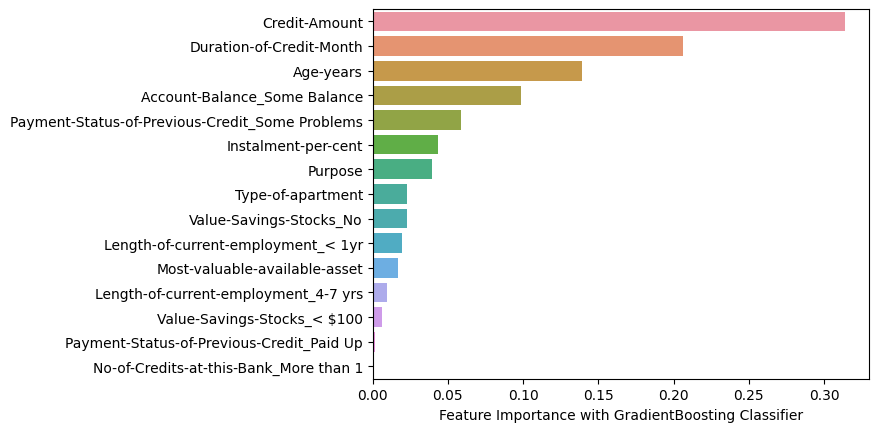

In [69]:
df_feature_importance = pd.DataFrame(gbc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with GradientBoosting Classifier')
plt.show

### Confusion matrix

In [71]:
print(classification_report(test_y, gbc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.79      0.82      0.80       103
Non-Creditworthy       0.56      0.51      0.53        47

        accuracy                           0.72       150
       macro avg       0.67      0.66      0.67       150
    weighted avg       0.71      0.72      0.72       150



In [139]:
tp, fp, fn, tn= confusion_matrix(test_y, gbc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  24
False Positives:  19
False Negatives:  23
True Positives:  84


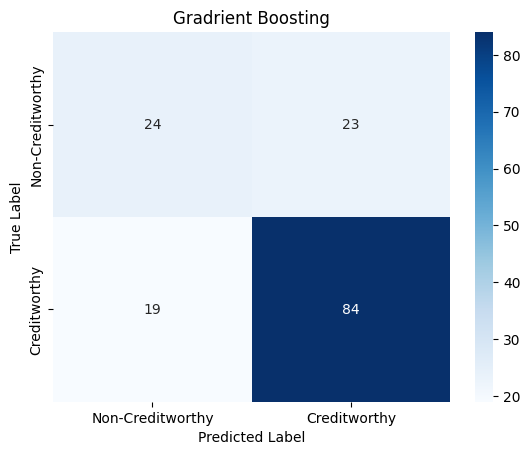

In [140]:
cm3 = confusion_matrix(test_y, gbc_pred, labels=['Non-Creditworthy', 'Creditworthy'])

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Creditworthy', 'Creditworthy'],
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Gradrient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [141]:
# Accuracy
gbc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
gbc_creditworthy=round(tp/(tp+fp), 2)
gbc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(gbc_acc))
gbc_creditworthy, gbc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.72%


(0.82, 0.51)

## ROC AND AUC GRAPH for MODEL COMPARISON

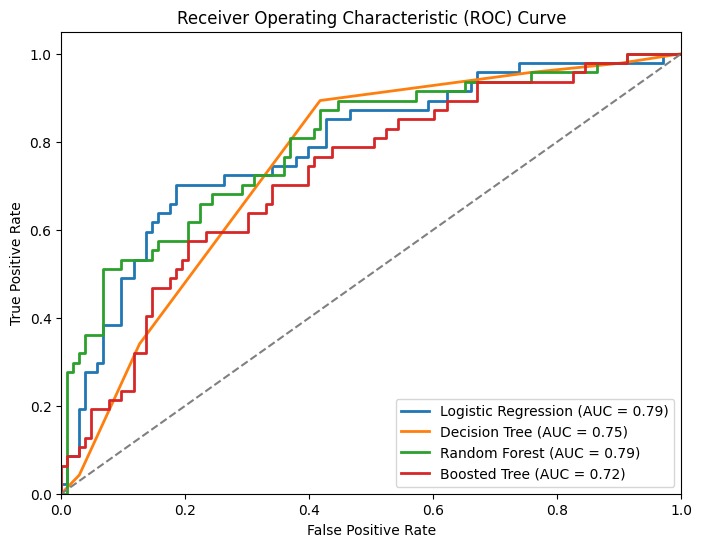

In [159]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'Creditworthy' is the positive class
label_encoder = LabelEncoder()
test_y_binary = label_encoder.fit_transform(test_y)

fig, ax = plt.subplots(figsize=(8, 6))

models = [
    ("Logistic Regression", lreg),
    ("Decision Tree", dtc),
    ("Random Forest", rfc),
    ("Boosted Tree", gbc)
]

for name, model in models:
    if name == "Linear Regression":
        y_prob = model.predict(test_X)
    else:
        y_prob = model.predict_proba(test_X)[:, 1]
    
    fpr, tpr, _ = roc_curve(test_y_binary, y_prob)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')

plt.show()




In [77]:
from pandas.plotting import table

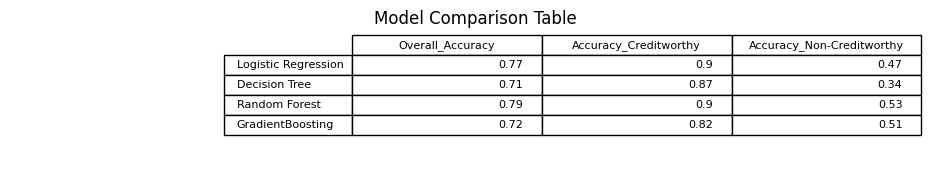

In [78]:
model_accuracy = {'Overall_Accuracy':[lr_acc, dtc_acc, rfc_acc, gbc_acc],
                 'Accuracy_Creditworthy':[lr_creditworthy, dtc_creditworthy, rfc_creditworthy, gbc_creditworthy],
                 'Accuracy_Non-Creditworthy':[lr_NonCreditworthy, dtc_NonCreditworthy, rfc_NonCreditworthy, gbc_NonCreditworthy]}
mc_df = pd.DataFrame(model_accuracy, index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'GradientBoosting'])

fig,ax = plt.subplots(figsize=(12,2)) # no visible frame
ax.set_frame_on(False)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
mc_table = table(ax, mc_df, loc='upper right', colWidths=[0.17]*len(mc_df.columns)) # where df is your data frame
mc_table.set_fontsize(12) # if ++fontsize is necessary ++colWidths
mc_table.scale(1.2, 1.2) # change size table
plt.title("Model Comparison Table")
plt.show()

In [95]:
predictions = rfc.predict(test_data)
result_df = pd.DataFrame({'Prediction': predictions})

result_df.to_csv('predicted_results.csv', index=False)

In [104]:
test_data = pd.DataFrame(data=test_X) 

test_data['Pediction'] = test_y

test_data.to_csv('test_data.csv', index=False)


# Scoring the test dataset

In [102]:
result_df= pd.read_csv('/Users/chauthanhuy/Documents/Luận PTDL CK/Predicting Default Risk/predicted_results.csv')

In [103]:
print("Prediction using Random Forest:")
print("Creditworthy:", (result_df=='Creditworthy').sum())
print("Non-Creditworthy:", (result_df=='Non-Creditworthy').sum())

Prediction using Random Forest:
Creditworthy: Prediction    413
dtype: int64
Non-Creditworthy: Prediction    87
dtype: int64
